📦 Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_17598/2451912077.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="120d", interval="1d")
[*********************100%***********************]  1 of 1 completed


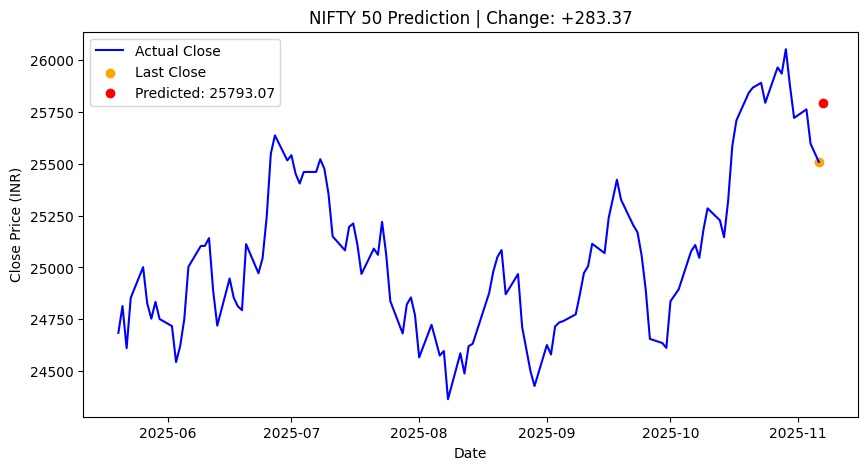

📈 Predicted next close: 25793.07 | Change: +283.37


In [2]:
# realtime_nifty_predict.py
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60

print("📦 Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

df = yf.download(TICKER, period="120d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

last_seq = scaled[-SEQ_LEN:]
X_test = np.expand_dims(last_seq, axis=0)
pred = model.predict(X_test, verbose=0)
pred_price = scaler.inverse_transform(pred)[0][0]

last_close = close_prices[-1][0]
diff = pred_price - last_close

plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], last_close, color="orange", label="Last Close")
plt.scatter(df.index[-1] + pd.Timedelta(days=1), pred_price, color="red",
            label=f"Predicted: {pred_price:.2f}")
plt.legend()
plt.title(f"NIFTY 50 Prediction | Change: {diff:+.2f}")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.show()

print(f"📈 Predicted next close: {pred_price:.2f} | Change: {diff:+.2f}")


📦 Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_1600/2451912077.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="120d", interval="1d")
[*********************100%***********************]  1 of 1 completed


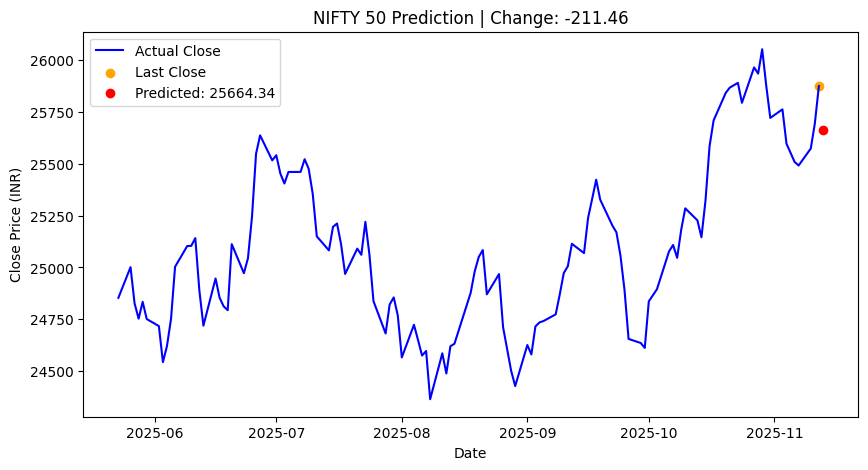

📈 Predicted next close: 25664.34 | Change: -211.46


In [1]:
# realtime_nifty_predict.py
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60

print("📦 Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

df = yf.download(TICKER, period="120d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

last_seq = scaled[-SEQ_LEN:]
X_test = np.expand_dims(last_seq, axis=0)
pred = model.predict(X_test, verbose=0)
pred_price = scaler.inverse_transform(pred)[0][0]

last_close = close_prices[-1][0]
diff = pred_price - last_close

plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], last_close, color="orange", label="Last Close")
plt.scatter(df.index[-1] + pd.Timedelta(days=1), pred_price, color="red",
            label=f"Predicted: {pred_price:.2f}")
plt.legend()
plt.title(f"NIFTY 50 Prediction | Change: {diff:+.2f}")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.show()

print(f"📈 Predicted next close: {pred_price:.2f} | Change: {diff:+.2f}")


📦 Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_1600/3195467309.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="180d", interval="1d")
[*********************100%***********************]  1 of 1 completed


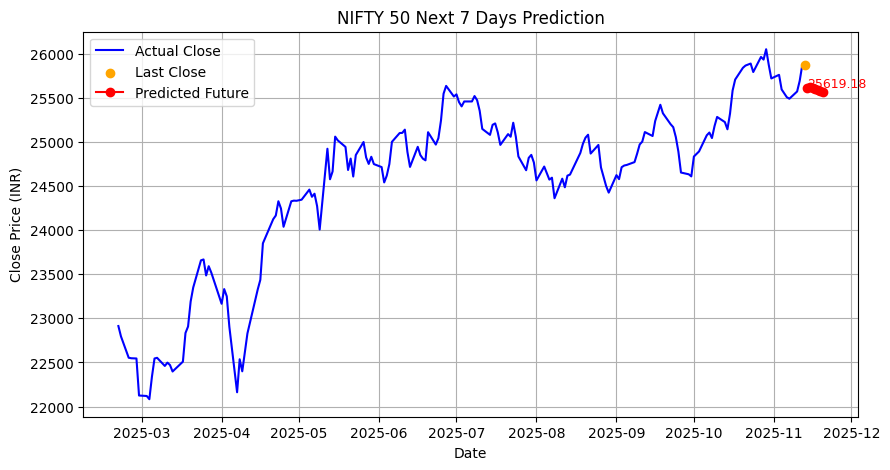


📅 Future Predictions (with Dates):
2025-11-14 → 25619.18 INR
2025-11-15 → 25620.67 INR
2025-11-16 → 25615.84 INR
2025-11-17 → 25607.15 INR
2025-11-18 → 25596.14 INR
2025-11-19 → 25583.79 INR
2025-11-20 → 25570.70 INR


In [6]:
# realtime_nifty_predict_days.py
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ---------- CONFIG ----------
MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60
PRED_DAYS = 7   # 🔹 Number of future days to predict

# ---------- LOAD MODEL ----------
print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

# ---------- DOWNLOAD LATEST DATA ----------
df = yf.download(TICKER, period="180d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

# ---------- MULTI-DAY PREDICTION ----------
future_preds = []
last_seq = scaled[-SEQ_LEN:].copy()

for _ in range(PRED_DAYS):
    X_test = np.expand_dims(last_seq, axis=0)
    pred = model.predict(X_test, verbose=0)
    future_pred = pred[0][0]
    future_preds.append(future_pred)
    last_seq = np.append(last_seq, [[future_pred]], axis=0)
    last_seq = last_seq[-SEQ_LEN:]

future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# ---------- PLOT ----------
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=PRED_DAYS)
plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], close_prices[-1], color="orange", label="Last Close", zorder=5)
plt.plot(future_dates, future_prices, color="red", marker="o", label="Predicted Future")

# Annotate first predicted point
plt.text(future_dates[0], future_prices[0],
         f"{future_prices[0][0]:.2f}", color="red", fontsize=9, ha="left")

plt.title(f"NIFTY 50 Next {PRED_DAYS} Days Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- PRINT RESULTS ----------
print("\nFuture Predictions (with Dates):")
for date, price in zip(future_dates, future_prices.flatten()):
    print(f"{date.strftime('%Y-%m-%d')} → {price:.2f} INR")



📦 Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_8955/3195467309.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="180d", interval="1d")
[*********************100%***********************]  1 of 1 completed


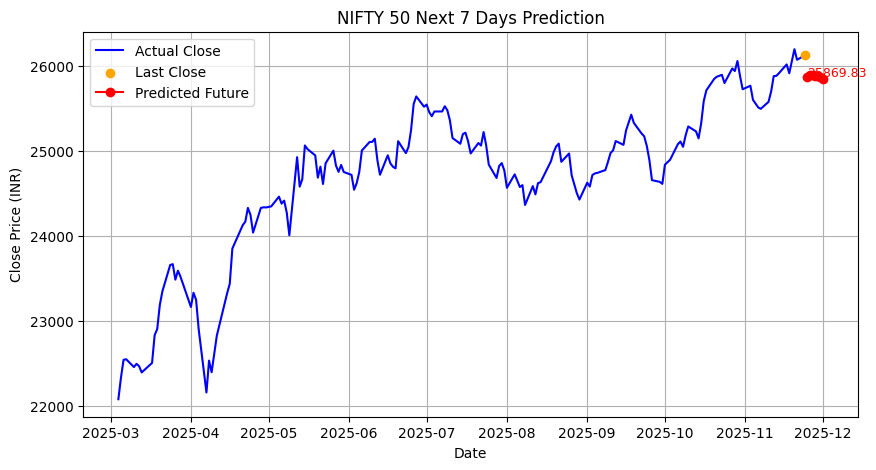


📅 Future Predictions (with Dates):
2025-11-25 → 25869.83 INR
2025-11-26 → 25885.69 INR
2025-11-27 → 25888.33 INR
2025-11-28 → 25883.02 INR
2025-11-29 → 25873.03 INR
2025-11-30 → 25860.34 INR
2025-12-01 → 25846.16 INR


In [1]:
# realtime_nifty_predict_days.py
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ---------- CONFIG ----------
MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60
PRED_DAYS = 7   # 🔹 Number of future days to predict

# ---------- LOAD MODEL ----------
print("📦 Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

# ---------- DOWNLOAD LATEST DATA ----------
df = yf.download(TICKER, period="180d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

# ---------- MULTI-DAY PREDICTION ----------
future_preds = []
last_seq = scaled[-SEQ_LEN:].copy()

for _ in range(PRED_DAYS):
    X_test = np.expand_dims(last_seq, axis=0)
    pred = model.predict(X_test, verbose=0)
    future_pred = pred[0][0]
    future_preds.append(future_pred)
    last_seq = np.append(last_seq, [[future_pred]], axis=0)
    last_seq = last_seq[-SEQ_LEN:]

future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# ---------- PLOT ----------
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=PRED_DAYS)
plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], close_prices[-1], color="orange", label="Last Close", zorder=5)
plt.plot(future_dates, future_prices, color="red", marker="o", label="Predicted Future")

# Annotate first predicted point
plt.text(future_dates[0], future_prices[0],
         f"{future_prices[0][0]:.2f}", color="red", fontsize=9, ha="left")

plt.title(f"NIFTY 50 Next {PRED_DAYS} Days Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- PRINT RESULTS ----------
print("\n📅 Future Predictions (with Dates):")
for date, price in zip(future_dates, future_prices.flatten()):
    print(f"{date.strftime('%Y-%m-%d')} → {price:.2f} INR")



Loading model...


/var/folders/wg/d1y3qvk103gdr7sntsqgtyb40000gn/T/ipykernel_2945/3533759437.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="180d", interval="1d")
[*********************100%***********************]  1 of 1 completed


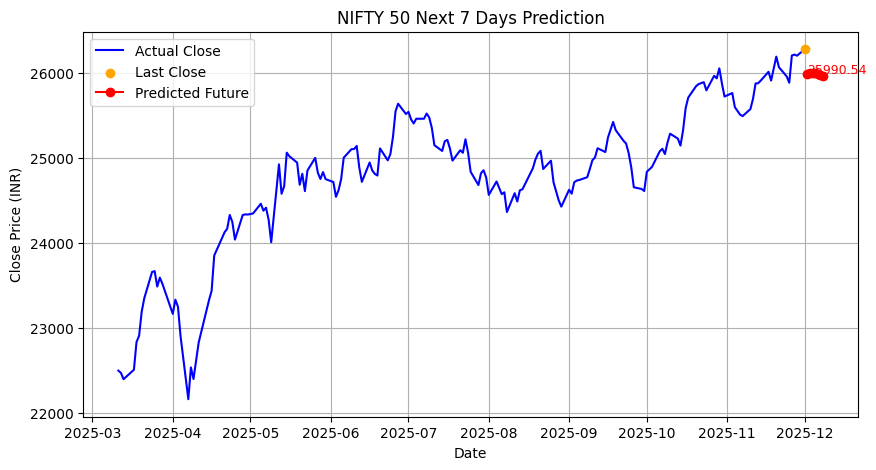


Future Predictions (with Dates):
2025-12-02 → 25990.54 INR
2025-12-03 → 26003.79 INR
2025-12-04 → 26004.79 INR
2025-12-05 → 25998.41 INR
2025-12-06 → 25987.68 INR
2025-12-07 → 25974.45 INR
2025-12-08 → 25959.83 INR


In [1]:
# realtime_nifty_predict_days.py
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ---------- CONFIG ----------
MODEL_PATH = "models/nifty_lstm_model.h5"
TICKER = "^NSEI"
SEQ_LEN = 60
PRED_DAYS = 7   # 🔹 Number of future days to predict

# ---------- LOAD MODEL ----------
print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
scaler = MinMaxScaler(feature_range=(0, 1))

# ---------- DOWNLOAD LATEST DATA ----------
df = yf.download(TICKER, period="180d", interval="1d")
close_prices = df["Close"].values.reshape(-1, 1)
scaled = scaler.fit_transform(close_prices)

# ---------- MULTI-DAY PREDICTION ----------
future_preds = []
last_seq = scaled[-SEQ_LEN:].copy()

for _ in range(PRED_DAYS):
    X_test = np.expand_dims(last_seq, axis=0)
    pred = model.predict(X_test, verbose=0)
    future_pred = pred[0][0]
    future_preds.append(future_pred)
    last_seq = np.append(last_seq, [[future_pred]], axis=0)
    last_seq = last_seq[-SEQ_LEN:]

future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# ---------- PLOT ----------
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=PRED_DAYS)
plt.figure(figsize=(10, 5))
plt.plot(df.index, close_prices, label="Actual Close", color="blue")
plt.scatter(df.index[-1], close_prices[-1], color="orange", label="Last Close", zorder=5)
plt.plot(future_dates, future_prices, color="red", marker="o", label="Predicted Future")

# Annotate first predicted point
plt.text(future_dates[0], future_prices[0],
         f"{future_prices[0][0]:.2f}", color="red", fontsize=9, ha="left")

plt.title(f"NIFTY 50 Next {PRED_DAYS} Days Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- PRINT RESULTS ----------
print("\nFuture Predictions (with Dates):")
for date, price in zip(future_dates, future_prices.flatten()):
    print(f"{date.strftime('%Y-%m-%d')} → {price:.2f} INR")

